In [18]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# import dask.dataframe as dd
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
data_path = '/home/rayandrew/Data/azure-data/vmtable.csv.gz'
headers = ['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecountbucket', 'vmmemorybucket']
trace_dataframe = pd.read_csv(data_path, header=None, index_col=False,names=headers,delimiter=',')

In [3]:
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket
0,71fJw0x+SDRdAxKPwLyHZhTgQpYw2afS6tjJhfT6kHnmLH...,GB6uQC1NSArW5n+TtOybL7GQ1yByjuWtZnsj+5QccZ525R...,2sh/ZjaYdfpslv4iYBfNzFe4rs982kHVvNGJGeQ8MIBCDr...,558300,1673700,91.776885,0.728879,20.759630,Delay-insensitive,8,32
1,rKggHO/04j31UFy65mDTwtjdMQL/G03xWfl3xGeiilB4/W...,ub4ty8ygwOECrIz7eaZ/9hDwnCsERvZ3nJJ03sDSpD85et...,+ZraIDUNaWYDZMBiBtZm7xSjr+j3zcHGjup1+wyKxHFmyJ...,424500,425400,37.879261,3.325358,37.879261,Unknown,4,32
2,YrR8gPtBmfNaOdnNEW5If1SdTqQgGQHEnLHGPjySt53bKW...,9LrdYRcUfGbmL2fFfLR/JUg2OTkjGRe3iluwIhDRPnPDPa...,GEyIElfPSFupze8T+T1niQMepeqG88VpLNuxUMyIDbz8VF...,1133100,1133700,0.304368,0.220553,0.304368,Unknown,4,32
3,xzQ++JF1UAkh70CDhmzkiOo+DQn+E2TLErCFKEmSswv1pl...,0XnZZ8sMN5HY+Yg+0dykYB5oenlgsrCpzpgFSvn/MX42Ze...,7aCQS6fPUw9rwCPiqvghk/WCEbMV3KgNJjA+sssdfY5Ybl...,0,2591400,98.573424,30.340054,98.212503,Interactive,2,4
4,vZEivnhabRmImDr+JqKqZnpIM3WxtypwoxjfjnklR/idyR...,HUGaZ+piPP4eHjycCBki2yq0raJywdzrVuriR6nQceH3hA...,/s/D5VtTQDxyS6wq7N/VQAMczx61Ny1Ut3a3iFmDSOCXxp...,228300,229800,82.581449,13.876299,82.581449,Unknown,2,4


In [21]:
trace_dataframe[trace_dataframe["vmid"] == 'yNf/R3X8fyXkOJm3ihXQcT0F52a8cDWPPRzTT6QFW8N+1QPfeKR5//6xyX0VYn7X']

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket
2147388,yNf/R3X8fyXkOJm3ihXQcT0F52a8cDWPPRzTT6QFW8N+1Q...,GStyJfehx9FBLRCvqDxCk4Hpxi8bLCol58JJyfnuSEvH4N...,RGHDvmXwj8cETX3k68dVVukX9cnPNMYn6VjPbcvSKKQOxG...,0,963900,80.105755,13.641498,47.415849,Interactive,2,2


In [8]:
len(trace_dataframe)

2695548

In [22]:
# data_path = 
reading_headers = ['timestamp', 'vmid', 'mincpu', 'maxcpu', 'avgcpu']
# headers = ['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecountbucket', 'vmmemorybucket']
df = pd.read_csv('/home/rayandrew/Data/azure-data/vm_cpu_readings-file-1-of-195.csv.gz', header=None, names=reading_headers, index_col=False, delimiter=',')

In [23]:
df.head()

,timestamp,vmid,mincpu,maxcpu,avgcpu
0,0,yNf/R3X8fyXkOJm3ihXQcT0F52a8cDWPPRzTT6QFW8N+1Q...,19.898441,24.996361,22.630673
1,0,gVb4X4iS13nJrM0KZsy7SrHzWAHix0CEPlK7/deV5vkwjt...,14.281488,20.028324,17.250655
2,0,f8BtQHczrXFjnVxWl8Hqm1kH9UD/8nCvtXCLiFvVRvamqa...,1.655368,23.138685,8.533818
3,0,8xjtVrJRJAyArNlbRgCftoNQOZiWl2eRP6uQavL9+6IULT...,47.501061,52.940579,50.045584
4,0,zTE3f0H2n43tW+PA3OdonjUTWWxeyzF7xJk9QH9s/487J/...,1.724155,12.889580,4.833578


<Axes: >

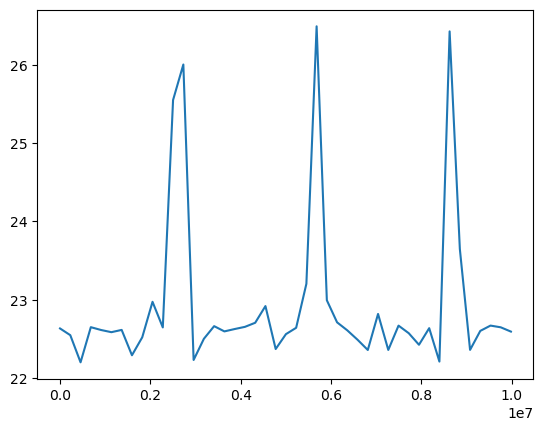

In [17]:
df[df[1]== 'yNf/R3X8fyXkOJm3ihXQcT0F52a8cDWPPRzTT6QFW8N+1QPfeKR5//6xyX0VYn7X'][4]

In [19]:
sns.ecdfplot(data=, y="4")

ValueError: Could not interpret value `4` for parameter `y`